<a href="https://colab.research.google.com/github/syeadn2001/data_analytics_2/blob/main/Logistic_Regression_Guided_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [47]:
#Standard Libraries for visualization and data wrangling 

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns; sns.set()
%matplotlib inline


#Logistic Regression Models

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

%matplotlib inline

## Get the Data
**Read in the advertising.csv file and load it to a data frame called ad_data.**
The dATA PATH:
https://raw.githubusercontent.com/niteen11/cuny_lagcc_micro_credential_data_analytics/main/Track%20A/Unit%204%20-%20Machine%20Learning%20and%20Modeling%20Techniques/Dataset/advertising.csv

In [ ]:
ad_data = pd.read_csv("https://raw.githubusercontent.com/niteen11/cuny_lagcc_micro_credential_data_analytics/main/Track%20A/Unit%204%20-%20Machine%20Learning%20and%20Modeling%20Techniques/Dataset/advertising.csv")

**Check the head of ad_data**

In [ ]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [ ]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [ ]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b6a515d50>]],
      dtype=object)

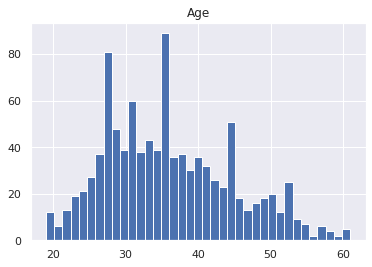

In [19]:
ad_data.hist('Age', bins=37)

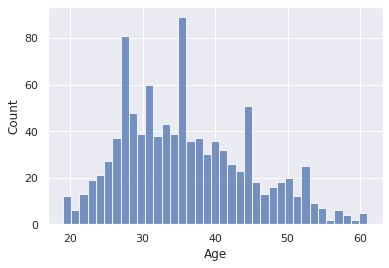

In [15]:
sns.histplot(data=ad_data,x="Age", bins=37)

**Observation**: Based on the distribution graph that shows correlation between age and count, the older a person is, the less likely they are going to click on the ads People aged 25-35 clicked on ads the most. For older age groups the correlation is negative.



**Create a jointplot showing Area Income versus Age.**

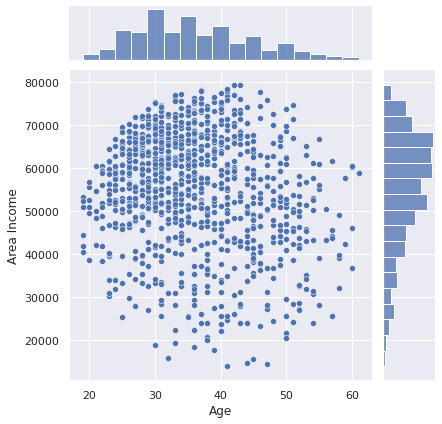

In [21]:
sns.jointplot(x=ad_data['Age'], y=ad_data['Area Income'])

**OBSERVATION**: For Area Income, the data is very spread out but there is a cluster of dots around income 50000-70000 for people aged 25-35. Based on these two graphs, it seems that people age 25-35 who had a decent income also clicked the most on ads so there's a positive correlation that people who make more also spend more.



**Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

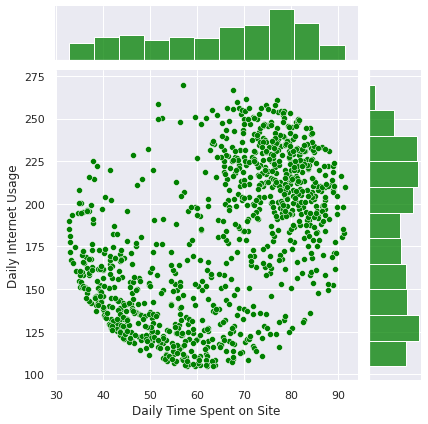

In [26]:
sns.jointplot(x = ad_data['Daily Time Spent on Site'], y = ad_data['Daily Internet Usage'], color='green')

# Logistic Regression

Now it's time to do a train test split, and train the model.

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [27]:
#create new variable for the data set that we will spilit,let say ds
ds = ad_data

In [29]:
#configuring inputs and dependable variable
#Let have values from our colums as input ,call it X (usually we designate the input as capital X)
#X=ds ['Daily Time Spent on Site','ccccc',](all colums are going to be as an input )
#y=ds [name of dependent variable as an out put,Let say, 'Clicked on Ad']

In [42]:
X = ds.drop(columns=['Clicked on Ad', 'City', 'Ad Topic Line', 'Country', 'Timestamp'], axis = 1)
y = ds['Clicked on Ad']

In [ ]:
# we split the date for train and test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

** Train and fit a logistic regression model on the training set.**

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [44]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((750, 5), (250, 5), (750,), (250,))

In [45]:
logModel = LogisticRegression()
logModel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predictions and Evaluations
** Now predict values for the testing data.**

In [48]:
predict = logModel.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, predict))

Accuracy: 0.912


** Create a classification report for the model.**

In [49]:
print(classification_report(y_true=y_test, y_pred=predict))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       136
           1       0.92      0.89      0.90       114

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250



In [52]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predict))

[[127   9]
 [ 13 101]]
